In [ ]:
# 1. Imports & Load Data
I began by importing essential libraries (Pandas, NumPy, Matplotlib) and loading the Telco Customer Churn dataset into memory.  
This is the starting point of my analysis.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

# Load from the same folder as your notebook
df = pd.read_csv("Churn Original Dataset.csv")
print("Shape:", df.shape)
df.head()


Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# 2. Quick Dataset Overview
I then performed an initial inspection of the dataset:
- Check the number of rows and columns (shape)  
- Review column data types  
- Detect missing values  
- Display a random sample of rows  

This helped me understand the raw dataset before cleaning.


In [3]:
print("Dtypes:\n", df.dtypes)
print("\nMissing values per column:\n", df.isna().sum())
display(df.sample(5, random_state=42))


Dtypes:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Missing values per column:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
Paperles

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,1024-GUALD,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.8,Yes
2715,0484-JPBRU,Male,0,No,No,41,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,No
3825,3620-EHIMZ,Female,0,Yes,Yes,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.7,No
1807,6910-HADCM,Female,0,No,No,1,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,Yes
132,8587-XYZSF,Male,0,No,No,67,Yes,No,DSL,No,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.1,No


In [ ]:
# 3. Data Cleaning
Steps taken to improve data quality:
- Standardised column names (lowercase, underscores, no spaces)  
- Removed extra whitespace from string fields  
- Harmonised categorical labels (e.g., "No internet service" → "No")  
- Converted `TotalCharges` to numeric, fix invalid entries, and fill missing values  

These steps ensure consistency and correctness across the dataset.


In [5]:
# Standardize column names and strip string cells
df.columns = df.columns.str.strip().str.replace(" ", "_")
obj_cols = df.select_dtypes(include="object").columns
df[obj_cols] = df[obj_cols].apply(lambda s: s.str.strip())

# Harmonize service labels
df = df.replace({"No internet service": "No", "No phone service": "No"})

# TotalCharges to numeric; fix tenure==0 case; fill remaining nulls with median
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
mask_t0 = (df["tenure"] == 0) & df["TotalCharges"].isna()
df.loc[mask_t0, "TotalCharges"] = df.loc[mask_t0, "MonthlyCharges"]
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

print("Nulls remaining (all columns):", df.isna().sum().sum())
df.head(3)


Nulls remaining (all columns): 0


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [ ]:
# 4. Data Quality & Ethics
I examined class balance in the target variable (`Churn`).  

- Distribution of churned vs. non-churned customers was plotted  
- Observed imbalance: **Yes ~26.5%, No ~73.5%**  
- Note: This imbalance could bias models toward predicting "No churn"  

**Mitigation strategies:**  
- Use class weights  
- Apply resampling (oversample churners / undersample non-churners)  
- Threshold tuning during modelling


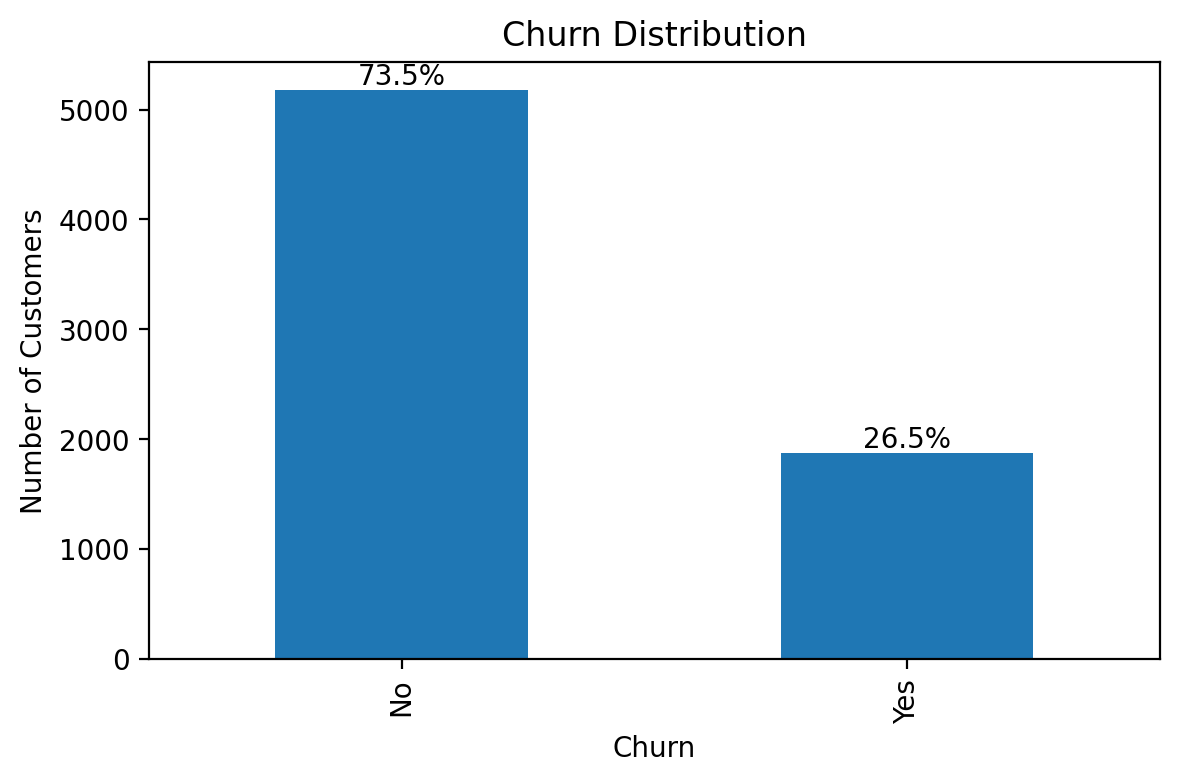

Churn % split:
 Churn
No     73.46
Yes    26.54
Name: count, dtype: float64

Note: Class imbalance can bias models toward predicting 'No churn'. Mitigations: class weights, resampling, threshold tuning.


In [7]:
# Ensure target is visible as Yes/No for the plot (convert only if needed)
churn_series = df["Churn"]
if set(churn_series.unique()) == {0,1}:
    churn_series = churn_series.map({0:"No", 1:"Yes"})

counts = churn_series.value_counts()
pct = counts / counts.sum() * 100

plt.figure(figsize=(6,4))
counts.plot(kind="bar")
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
for i, v in enumerate(counts.values):
    plt.text(i, v + counts.max()*0.01, f"{pct.values[i]:.1f}%", ha="center")
plt.tight_layout()
plt.show()

print("Churn % split:\n", pct.round(2))
print("\nNote: Class imbalance can bias models toward predicting 'No churn'. Mitigations: class weights, resampling, threshold tuning.")


In [ ]:
# 5. Key Drivers Exploration
I explored churn behaviour across key categorical features using stacked bar plots:  

- **Contract type** (Month-to-month, One-year, Two-year)  
- **Internet Service type** (DSL, Fiber optic, None)  

This helps identify which customer groups are more vulnerable to churn.


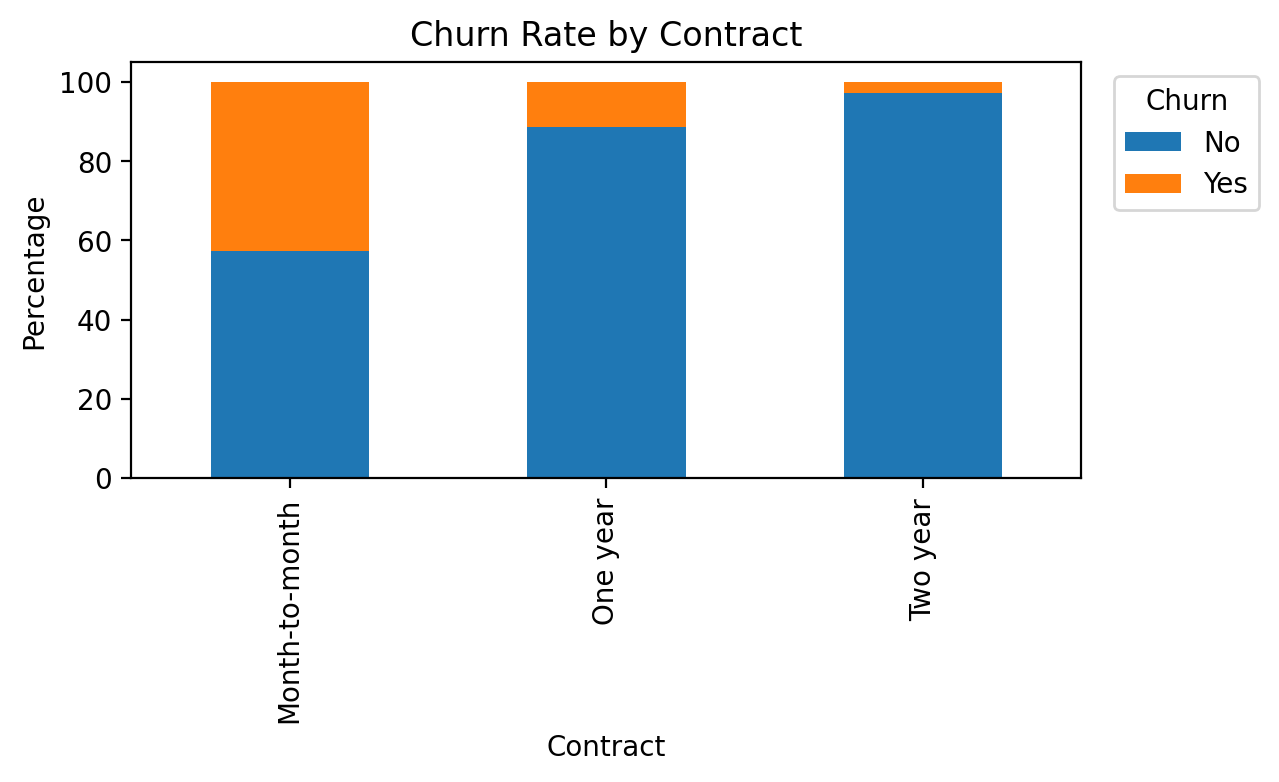

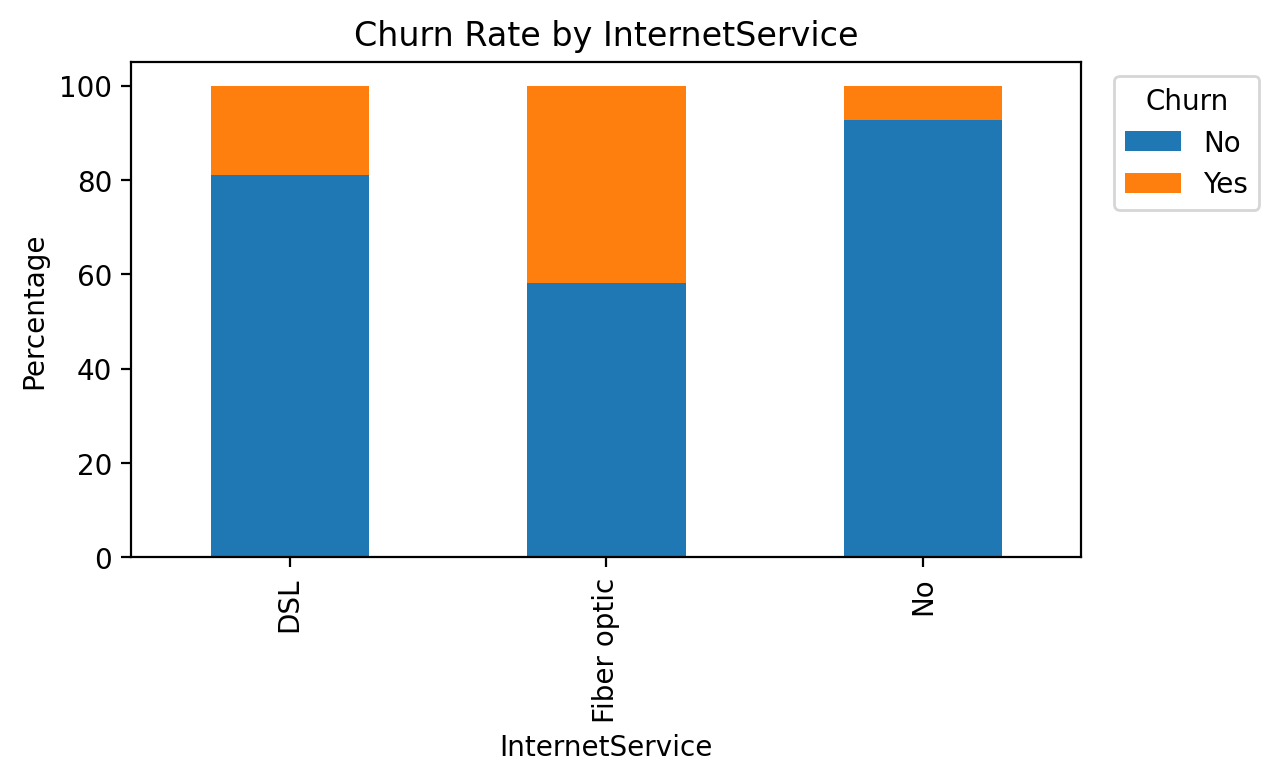

In [9]:
def stacked_churn_bar(df, column):
    # Work with a text target for readability
    churn_text = df["Churn"]
    if set(churn_text.unique()) == {0,1}:
        churn_text = churn_text.map({0:"No", 1:"Yes"})
    ct = pd.crosstab(df[column], churn_text, normalize="index") * 100
    ax = ct.plot(kind="bar", stacked=True, figsize=(6.5,4))
    plt.title(f"Churn Rate by {column}")
    plt.ylabel("Percentage")
    plt.legend(title="Churn", bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.show()
    return ct.round(1)

# Show only the essentials (if present)
if "Contract" in df.columns:
    ct_contract = stacked_churn_bar(df, "Contract")
if "InternetService" in df.columns:
    ct_internet = stacked_churn_bar(df, "InternetService")


In [ ]:
# 6. Feature Engineering
I enriched the dataset with new variables to improve predictive modelling:  

- **Tenure groups** (e.g., 0–6 months, 7–12 months, …)  
- **Average monthly spend** (TotalCharges ÷ Tenure)  
- **Binary encoding** for Yes/No features  
- **One-hot encoding** for categorical features  

Finally, I ensured the target variable (`Churn`) is numeric (1 = Yes, 0 = No).


In [11]:
# Tenure bands capture lifecycle stage
bins = [0, 6, 12, 24, 48, 72, np.inf]
labels = ["0-6m", "7-12m", "13-24m", "25-48m", "49-72m", "72m+"]
df["tenure_group"] = pd.cut(df["tenure"], bins=bins, labels=labels, include_lowest=True)

# Avg monthly spend stability
df["AvgMonthlySpend"] = df["TotalCharges"] / df["tenure"].replace(0, 1)

# Map Yes/No to 1/0 for binary columns
yn_cols = [c for c in df.columns
           if df[c].dtype == "object" and set(df[c].dropna().unique()) <= {"Yes","No"}]
for c in yn_cols:
    df[c] = df[c].map({"Yes":1, "No":0})

# Ensure target is 1/0
if df["Churn"].dtype == "object":
    df["Churn"] = df["Churn"].map({"Yes":1, "No":0})

# One-hot remaining categoricals (except ID)
cat_cols = df.select_dtypes(include="object").columns.tolist()
cat_cols = [c for c in cat_cols if c.lower() != "customerid"]
df_model = pd.get_dummies(df.drop(columns=["customerID"]), columns=cat_cols, drop_first=True)

print("Model-ready shape:", df_model.shape)
df_model.head()


Model-ready shape: (7043, 26)


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,tenure_group,AvgMonthlySpend,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,0-6m,29.850000,False,False,False,False,False,False,True,False
1,0,0,0,34,1,0,1,0,1,0,...,25-48m,55.573529,True,False,False,True,False,False,False,True
2,0,0,0,2,1,0,1,1,0,0,...,0-6m,54.075000,True,False,False,False,False,False,False,True
3,0,0,0,45,0,0,1,0,1,1,...,25-48m,40.905556,True,False,False,True,False,False,False,False
4,0,0,0,2,1,0,0,0,0,0,...,0-6m,75.825000,False,True,False,False,False,False,True,False


In [ ]:
# 7. Save Prepared Dataset
I created the output:   
- **telco_model_ready.csv** → Fully numeric, machine learning–ready dataset  

The second file is the finalized dataset to be uploaded to GitHub for this assignment.


In [13]:
df_model.to_csv("telco_model_ready.csv", index=False)  # FINAL project-ready dataset

print(" Saved:")
print(" - telco_model_ready.csv ")


 Saved:
 - telco_model_ready.csv 
